### Importing Dependencies

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

### Data loading and Data Analysis

In [88]:
medical_cost_data = pd.read_csv('Documents/medical_cost (3).csv')
medical_cost_data

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [89]:
medical_cost_data.shape

(1338, 8)

In [90]:
medical_cost_data.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [91]:
medical_cost_data.tail()

,Id,age,sex,bmi,children,smoker,region,charges
1333,1334,50,male,30.97,3,no,northwest,10600.5483
1334,1335,18,female,31.92,0,no,northeast,2205.9808
1335,1336,18,female,36.85,0,no,southeast,1629.8335
1336,1337,21,female,25.80,0,no,southwest,2007.9450
1337,1338,61,female,29.07,0,yes,northwest,29141.3603


In [92]:
medical_cost_data.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [93]:
medical_cost_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [94]:
medical_cost_data.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


### Data Analysis By visualiztion

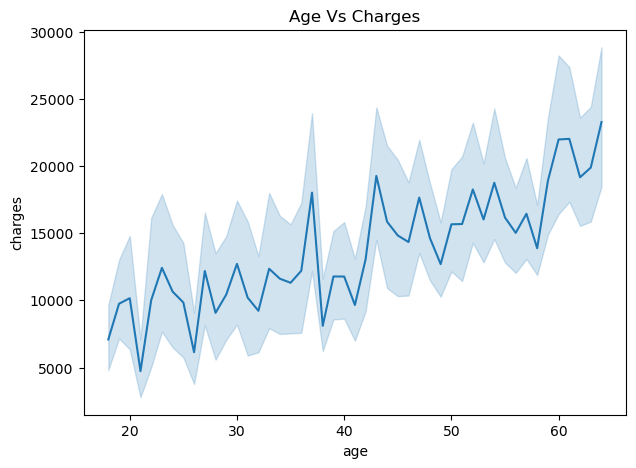

In [95]:
# Age vs charge
plt.figure(figsize=(7,5))
sns.lineplot(x= 'age',y= 'charges',data =medical_cost_data )
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age Vs Charges')
plt.show()

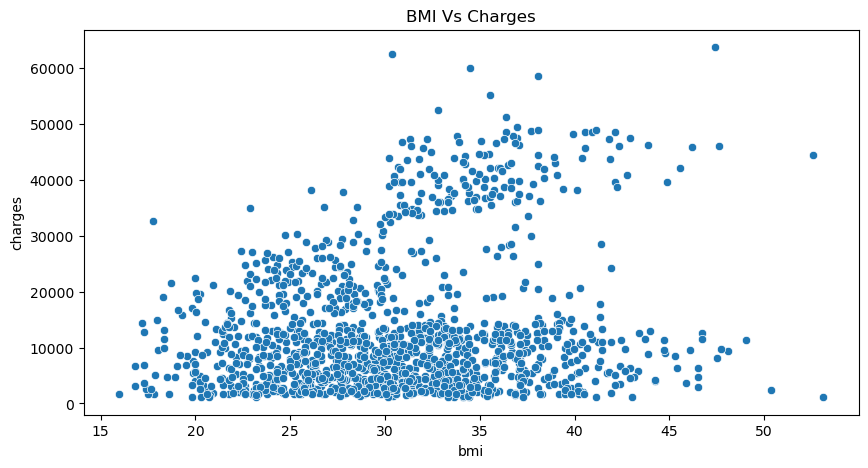

In [96]:
# Bmi vs charges
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'bmi',y= 'charges',data =medical_cost_data )
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('BMI Vs Charges')
plt.show()

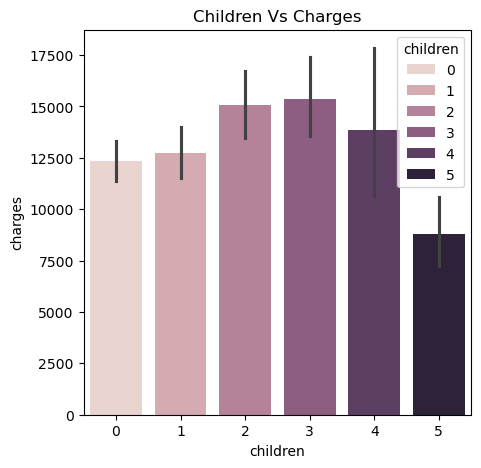

In [97]:
# Children vs Charges
plt.figure(figsize=(5,5))
sns.barplot(x= 'children',y= 'charges',hue= 'children',data =medical_cost_data )
plt.xlabel('children')
plt.ylabel('charges')
plt.title('Children Vs Charges')
plt.show()

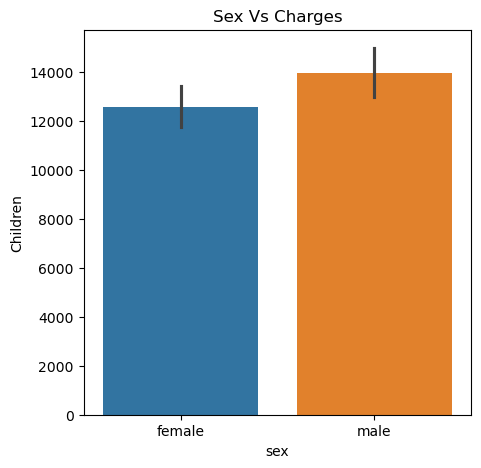

In [98]:
# Sex Vs charges
plt.figure(figsize=(5,5))
sns.barplot(x= 'sex',y= 'charges', hue = 'sex',data =medical_cost_data )
plt.xlabel('sex')
plt.ylabel('Children')
plt.title('Sex Vs Charges')
plt.show()

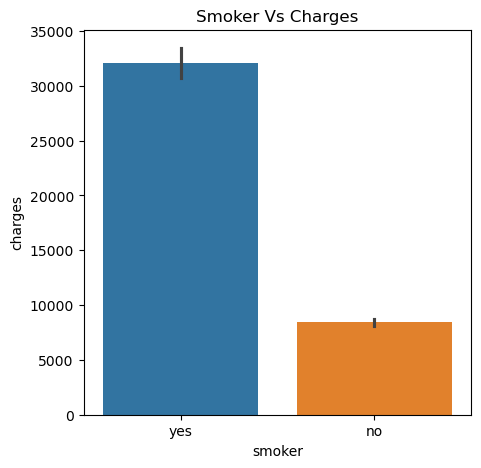

In [99]:
# Smoker VS Charges
plt.figure(figsize=(5,5))
sns.barplot(x= 'smoker',y= 'charges',hue= 'smoker',data =medical_cost_data )
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('Smoker Vs Charges')
plt.show()

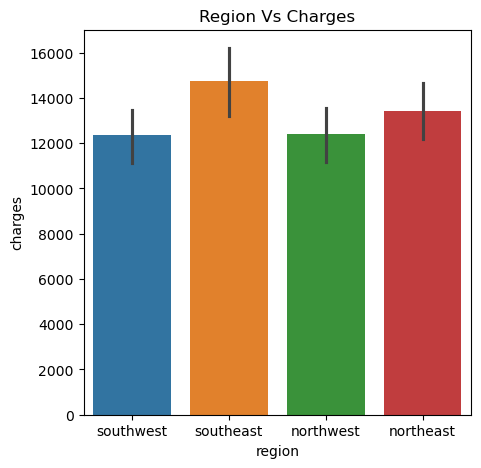

In [100]:
# REGION VS CHARGES
plt.figure(figsize=(5,5))
sns.barplot(x= 'region',y= 'charges',hue= 'region',data =medical_cost_data )
plt.xlabel('region')
plt.ylabel('charges')
plt.title('Region Vs Charges')
plt.show()

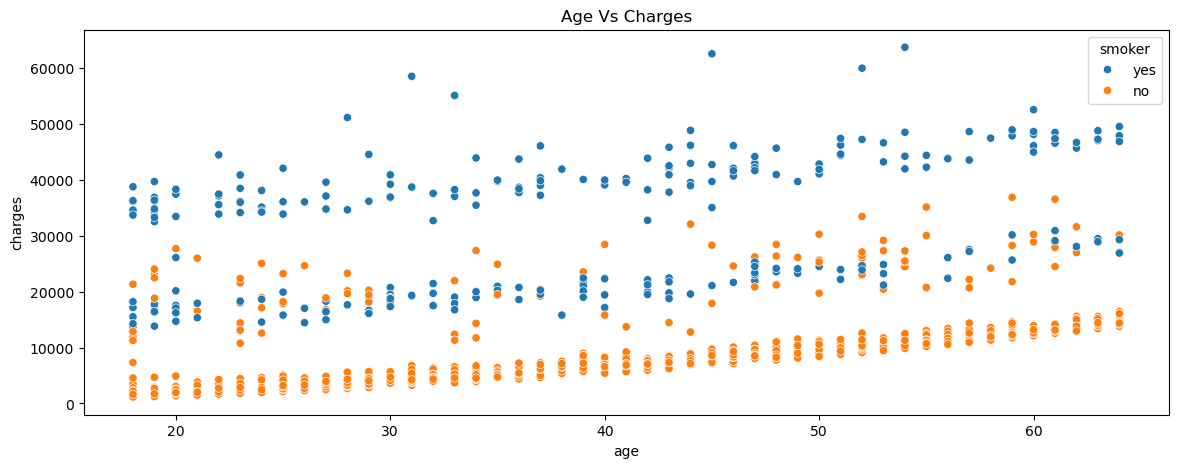

In [101]:
plt.figure(figsize=(14,5))
sns.scatterplot(x= 'age',y= 'charges',hue = 'smoker',data =medical_cost_data )
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age Vs Charges')
plt.show()

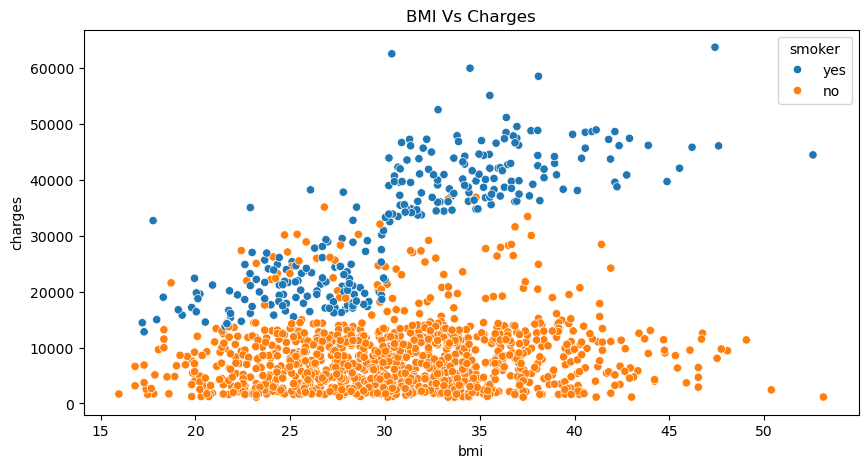

In [102]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'bmi',y= 'charges',hue ='smoker', data =medical_cost_data )
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('BMI Vs Charges')
plt.show()

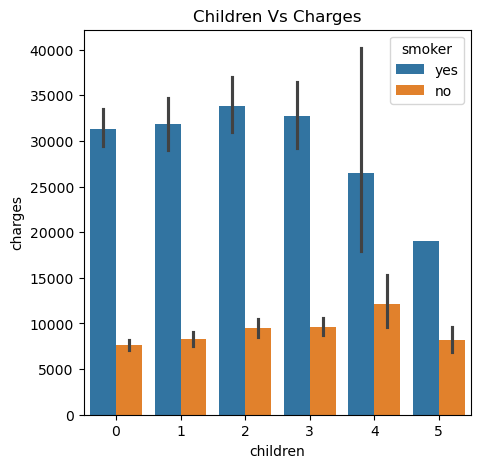

In [103]:
plt.figure(figsize=(5,5))
sns.barplot(x= 'children',y= 'charges', hue = 'smoker',data = medical_cost_data )
plt.xlabel('children')
plt.ylabel('charges')
plt.title('Children Vs Charges')
plt.show()

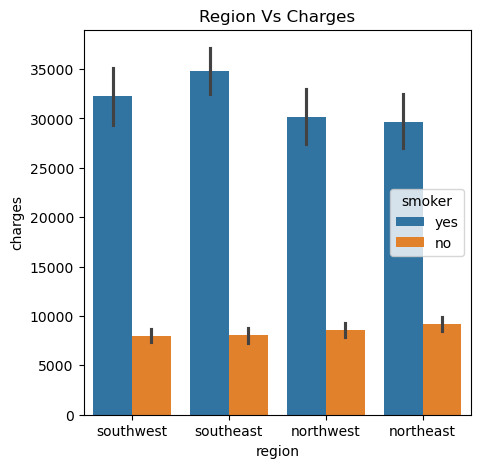

In [104]:
plt.figure(figsize=(5,5))
sns.barplot(x= 'region',y= 'charges',hue= 'smoker',data =medical_cost_data )
plt.xlabel('region')
plt.ylabel('charges')
plt.title('Region Vs Charges')
plt.show()

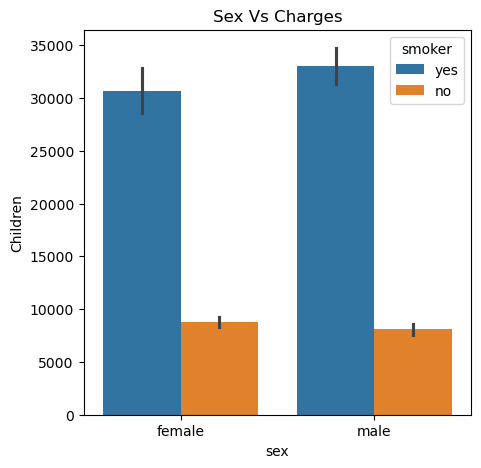

In [105]:
plt.figure(figsize=(5,5))
sns.barplot(x= 'sex',y= 'charges', hue = 'smoker',data =medical_cost_data )
plt.xlabel('sex')
plt.ylabel('Children')
plt.title('Sex Vs Charges')
plt.show()

### Data Preprocessing

##### label Encoding for cateogrical data

In [106]:
sex_Encoder = LabelEncoder()
smoker_Encoder = LabelEncoder()
region_Encoder = LabelEncoder()
medical_cost_data['sex'] = sex_Encoder.fit_transform(medical_cost_data.sex)
medical_cost_data['smoker'] = smoker_Encoder.fit_transform(medical_cost_data.smoker)
medical_cost_data['region'] = region_Encoder.fit_transform(medical_cost_data.region)

In [107]:
medical_cost_data

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,0,27.900,0,1,3,16884.92400
1,2,18,1,33.770,1,0,2,1725.55230
2,3,28,1,33.000,3,0,2,4449.46200
3,4,33,1,22.705,0,0,1,21984.47061
4,5,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,1,30.970,3,0,1,10600.54830
1334,1335,18,0,31.920,0,0,0,2205.98080
1335,1336,18,0,36.850,0,0,2,1629.83350
1336,1337,21,0,25.800,0,0,3,2007.94500


label Encoding 
sex: Female -->0 ,male-->1 ,smoker: yes-->1 ,no -->0 ,region: northeast-->0,northwest-->1,southeast-->2,southwest-->3

In [108]:
correlation  = medical_cost_data.corr()

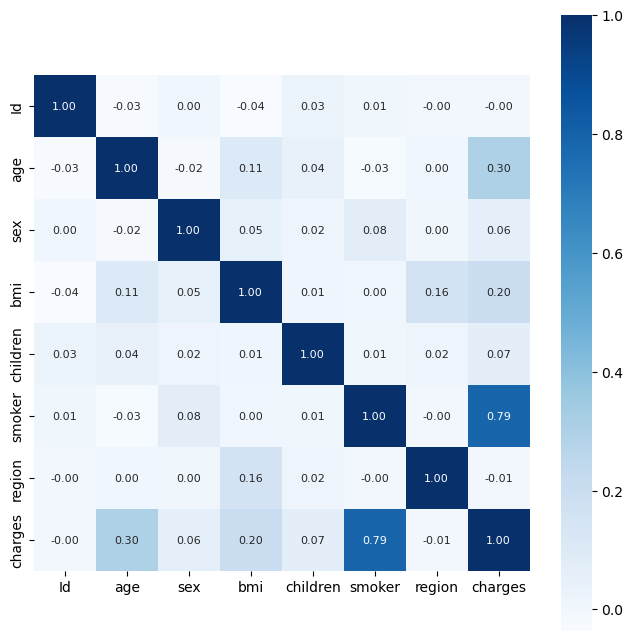

In [109]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation ,cmap = 'Blues' ,fmt = '.2f',cbar = True ,square =True,annot =True,annot_kws = {'size': 8})
plt.show()

### separating The input and output data

In [110]:
X = medical_cost_data.drop(columns= ['Id','charges'],axis =1)
print(X)
Y = medical_cost_data['charges']
print(Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [111]:
X_train ,X_test,Y_train ,Y_test =  train_test_split(X,Y,test_size  = 0.2,random_state =3)
X_train ,X_test,Y_train ,Y_test

(      age  sex     bmi  children  smoker  region
 782    51    1  35.970         1       0       2
 502    51    1  23.210         1       1       2
 147    51    0  37.730         1       0       2
 921    62    0  33.200         0       0       3
 164    37    1  29.640         0       0       1
 ...   ...  ...     ...       ...     ...     ...
 789    62    0  29.920         0       0       2
 256    56    1  33.630         0       1       1
 968    21    1  25.745         2       0       0
 952    30    0  28.405         1       0       1
 1273   35    1  27.610         1       0       2
 
 [1070 rows x 6 columns],
       age  sex     bmi  children  smoker  region
 353    33    1  35.245         0       0       0
 339    46    0  27.720         1       0       2
 65     19    0  28.900         0       0       3
 685    53    1  26.410         2       0       0
 781    18    1  41.140         0       0       2
 ...   ...  ...     ...       ...     ...     ...
 1274   26    1  27.06

In [112]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Fitting

In [113]:
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Model Evaluation

##### R2 Score

In [114]:
train_data_prediction = regressor.predict(X_train)
r2_score_train_data = metrics.r2_score(Y_train,train_data_prediction)
r2_score_train_data

0.9949027568474166

In [115]:
test_data_prediction = regressor.predict(X_test)
r2_score_test_data = metrics.r2_score(Y_test,test_data_prediction)
r2_score_test_data

0.8152004611617129

#### Accuracy Score

In [116]:
test_data_prediction

array([ 5017.9863  ,  8733.252   ,  1672.4482  , 16529.059   ,
        1592.3445  , 21416.94    ,  6738.956   ,   607.1016  ,
       10252.295   ,  4231.924   ,  9026.845   , 15118.432   ,
        1453.4197  , 13414.27    ,  4924.8936  , 16163.541   ,
       10999.129   ,   961.02997 ,  3901.205   , 10687.771   ,
       12729.13    ,  7682.395   ,  7317.843   ,  6440.715   ,
       11509.8955  , 15406.078   ,  6390.0815  ,  6747.042   ,
        5802.0747  ,  3431.8481  ,   302.28262 , 16329.435   ,
        2216.2817  ,  3661.3997  ,   -55.768642, 41387.92    ,
        3924.715   ,  6736.859   ,  3011.0735  ,  3731.2307  ,
        5651.3047  , 16078.939   ,  2803.629   , 16930.848   ,
       40909.066   ,  7814.143   ,  8341.376   ,  7150.2583  ,
         526.87427 , 18663.148   ,  6769.1543  , 37840.855   ,
        2007.5323  , 12313.699   , 45341.14    , 10338.633   ,
       44181.613   ,  1700.4213  , 19769.541   , 11242.949   ,
        2596.0693  ,  4028.9727  , 13261.279   , 25320.

In [117]:
mse = metrics.mean_absolute_error(Y_test,test_data_prediction)
mse

2864.0531830743125

#### Here we have model overfitting to overcome this we are using hyper paramerter tunning

### Randomized Search CV

In [118]:
model = XGBRegressor()

In [119]:
parameters  = { 'max_depth':[3,5,7],
               'learning_rate':[0.01,0.1,0.5],
               'n_estimators':[50,100,200]
              }

In [120]:
Regression1 = RandomizedSearchCV(model,parameters,cv =5)
Regression1.fit(X,Y)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200]})

In [121]:
Regression1.cv_results_

{'mean_fit_time': array([0.0590796 , 0.15086646, 0.04687223, 0.07499738, 0.07860298,
        0.04756889, 0.07812262, 0.03499498, 0.25360031, 0.05594835]),
 'std_fit_time': array([6.77776242e-03, 6.05270985e-03, 1.35374733e-06, 6.25083456e-03,
        9.67764941e-04, 1.42183685e-03, 9.65521657e-07, 6.26676320e-03,
        6.08099076e-03, 7.43223736e-03]),
 'mean_score_time': array([0.00448003, 0.00983801, 0.00625067, 0.003125  , 0.00937576,
        0.0031249 , 0.        , 0.00764909, 0.01003685, 0.00625091]),
 'std_score_time': array([0.00616027, 0.00807711, 0.00765547, 0.00625   , 0.00765528,
        0.00624981, 0.        , 0.00699517, 0.00828389, 0.00765577]),
 'param_n_estimators': masked_array(data=[100, 200, 50, 50, 100, 50, 50, 50, 200, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_max_depth': masked_array(data=[3, 5, 5, 7, 5, 5, 7, 3, 7, 3],
              mask=[False, False,

In [122]:
## Best Parmeters
best_parameters = Regression1.best_params_
best_parameters

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [123]:
## highest accuracy score
highest_score = Regression1.best_score_
highest_score

0.8561081716171376

### Model fitting and Model Evaluation after Randomized cv 

In [124]:
regressor = XGBRegressor(n_estimators = 100, max_depth =  3, learning_rate= 0.1)
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

##### R2 Score

In [125]:
train_data_prediction = regressor.predict(X_train)
r2_score_train_data = metrics.r2_score(Y_train,train_data_prediction)
r2_score_train_data

0.8966123378256695

In [126]:
test_data_prediction = regressor.predict(X_test)
r2_score_test_data = metrics.r2_score(Y_test,test_data_prediction)
r2_score_test_data

0.8628486145664009

#### Accuracy Score

In [127]:
mse = metrics.mean_absolute_error(Y_test,test_data_prediction)
mse

2414.2562828425844

### Prediction for Unknown Data

In [137]:
input_data = [30,'female',32.4,1,'no','southwest']
input_data[1] = sex_Encoder.transform([input_data[1]])[0]
input_data[4] = smoker_Encoder.transform([input_data[4]])[0]
input_data[5] = region_Encoder.transform([input_data[5]])[0]
input_data_as_array =  np.asarray(input_data ,dtype = np.float32)
input_data_reshaped = input_data_as_array.reshape(1,-1)
Prediction = regressor.predict(input_data_reshaped)
print("The Predicted Heath Insuarance cost is : ",Prediction)

The Predicted Heath Insuarance cost is :  [5406.4385]
